<a href="https://colab.research.google.com/github/Johnogunlola/CIoT-Lab/blob/main/Copy_of_Decision_Tree_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

In [ ]:
df= pd.read_csv('/content/IRIS.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
X=df[['sepal_length','sepal_width','petal_length','petal_width']]
Y=df['species']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
dtree= DecisionTreeClassifier()
dtree=dtree.fit(X_train,y_train)
y_predict=dtree.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_predict))


Accuracy: 0.9555555555555556


In [ ]:
Y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
#cm = metrics.confusion_matrix(y_test,dtree.predict(X_test))
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_predict)
df_cm = pd.DataFrame(cm, index=['SETOSA','VERSICOLR','VIRGINICA'],
                     columns = ['SETOSA','VERSICOLR','VIRGINICA'])
print(df_cm)


           SETOSA  VERSICOLR  VIRGINICA
SETOSA         14          0          0
VERSICOLR       0         17          1
VIRGINICA       0          1         12


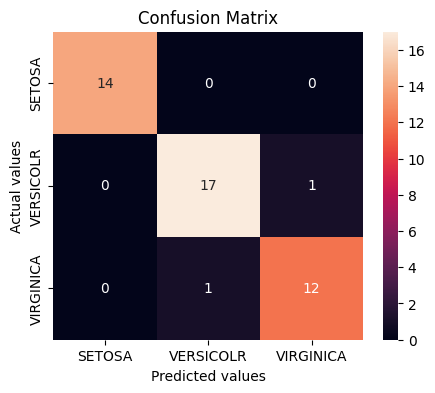

In [ ]:
import seaborn as sns
plt.figure(figsize=(5,4))
sns.heatmap(df_cm,annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.92      0.92      0.92        13

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



[Text(0.4, 0.9, 'petal_width <= 0.8\ngini = 0.665\nsamples = 105\nvalue = [36, 32, 37]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(0.35, 0.8, 'True  '),
 Text(0.5, 0.7, 'petal_width <= 1.65\ngini = 0.497\nsamples = 69\nvalue = [0, 32, 37]'),
 Text(0.45, 0.8, '  False'),
 Text(0.2, 0.5, 'petal_length <= 5.0\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.3, 0.3, 'sepal_length <= 6.05\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.5, 'petal_length <= 4.85\ngini = 0.056\nsamples = 35\nvalue = [0, 1, 34]'),
 Text(0.7, 0.3, 'sepal_width <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamp

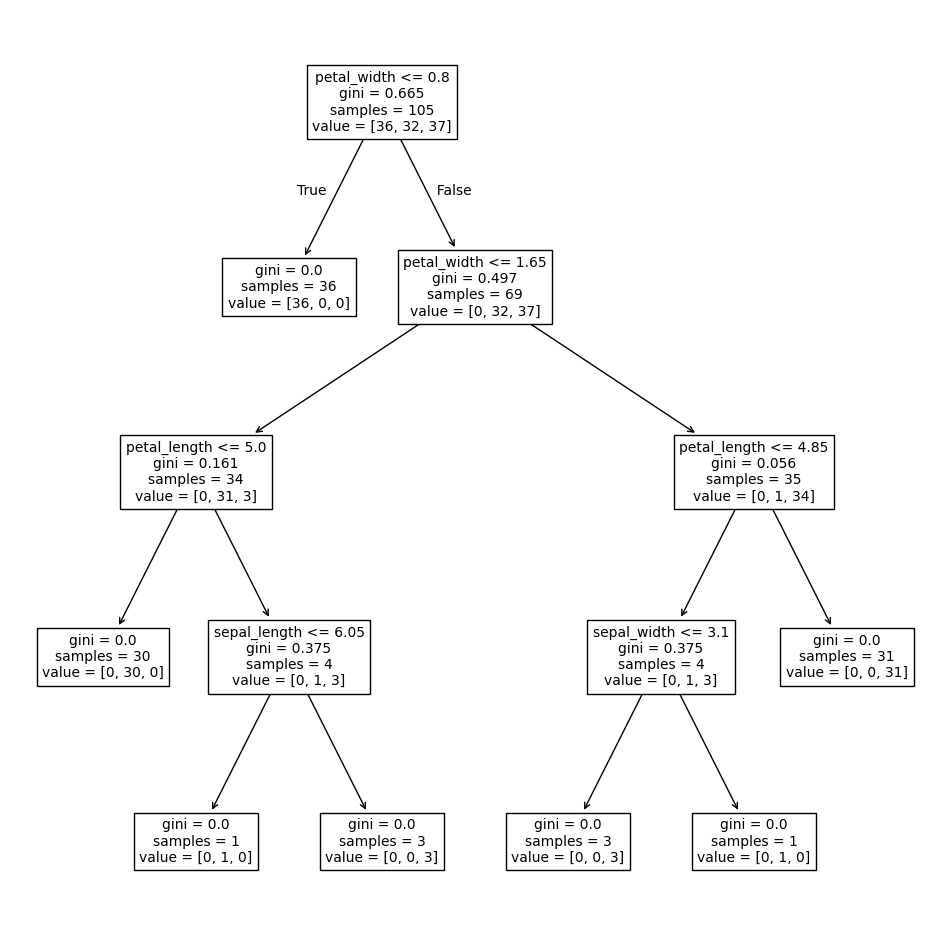

In [ ]:
features= ['sepal_length','sepal_width','petal_length','petal_width']
target=['species']
plt.figure(figsize=(12,12))
tree.plot_tree(dtree, feature_names=features,fontsize=10)